In [66]:
import mlflow
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [67]:
mlflow.set_tracking_uri(rf"file:///C:\Users\jc.ruedah\Desktop\FCM_carpeta\FCM_PROJECT\mlruns")

In [68]:
experiment = mlflow.get_experiment_by_name("Prueba2_cifar10_tol_02_n_400")
print("ID del experimento:", experiment.experiment_id)

ID del experimento: 924764764087094737


In [69]:
runs_df = mlflow.search_runs(experiment_ids=[experiment.experiment_id])
runs_df = runs_df[runs_df['status'] == 'FINISHED']

In [70]:
runs_df.columns

Index(['run_id', 'experiment_id', 'status', 'artifact_uri', 'start_time',
       'end_time', 'metrics.f1_BASE_Train', 'metrics.f1_BASE_test',
       'metrics.f1_BASE_Train_k', 'metrics.f1_BASE_test_k', 'params.neurons',
       'params.k_i', 'params.trial', 'params.fuzziness', 'params.K',
       'params.tol', 'tags.mlflow.user', 'tags.mlflow.source.name',
       'tags.mlflow.source.type', 'tags.mlflow.source.git.commit',
       'tags.mlflow.runName'],
      dtype='object')

In [71]:
dfx = runs_df[['metrics.f1_BASE_Train', 'metrics.f1_BASE_test_k',
       'metrics.f1_BASE_test', 'metrics.f1_BASE_Train_k', 'params.fuzziness',
       'params.neurons', 'params.trial', 'params.tol', 'params.k_i',
       'params.K']]


In [72]:

group_vars = [
    'params.fuzziness',
    'params.neurons',
    'params.trial',
    'params.tol',
    'params.K'
]

# Get index of row with max 'metrics.f1_BASE_test_k' per group
idx = dfx.groupby(group_vars)['metrics.f1_BASE_test_k'].idxmax()

# Extract the corresponding rows
best_rows = dfx.loc[idx, group_vars + [ 'params.k_i','metrics.f1_BASE_Train','metrics.f1_BASE_test','metrics.f1_BASE_Train_k','metrics.f1_BASE_test_k',]].reset_index(drop=True)

best_rows


,params.fuzziness,params.neurons,params.trial,params.tol,params.K,params.k_i,metrics.f1_BASE_Train,metrics.f1_BASE_test,metrics.f1_BASE_Train_k,metrics.f1_BASE_test_k
0,2.0,400,10,0.2,128,102,0.167816,0.164640,0.216965,0.197981
1,2.0,400,10,0.2,16,16,0.167816,0.164640,0.191693,0.183481
2,2.0,400,10,0.2,2,2,0.167816,0.164640,0.172491,0.155374
3,2.0,400,10,0.2,32,32,0.167816,0.164640,0.205253,0.195787
4,2.0,400,10,0.2,4,3,0.167816,0.164640,0.167751,0.155208
5,2.0,400,10,0.2,64,55,0.167816,0.164640,0.204352,0.192292
6,2.0,400,10,0.2,8,7,0.167816,0.164640,0.163315,0.155380
7,2.0,400,12,0.2,128,3,0.289759,0.280234,0.285695,0.275464
8,2.0,400,12,0.2,16,1,0.289759,0.280234,0.300359,0.276195
9,2.0,400,12,0.2,2,1,0.289759,0.280234,0.286174,0.276677


In [73]:
best_rows[['params.trial', 'metrics.f1_BASE_Train']]

,params.trial,metrics.f1_BASE_Train
0,10,0.167816
1,10,0.167816
2,10,0.167816
3,10,0.167816
4,10,0.167816
5,10,0.167816
6,10,0.167816
7,12,0.289759
8,12,0.289759
9,12,0.289759


In [74]:
df_final = pd.melt(best_rows.drop(columns='params.k_i'),id_vars=['params.trial', 'params.neurons','params.tol', 'params.fuzziness','params.K'],
        var_name='Variable',value_name='f1_score_macro')

df_final['Variable'] = df_final['Variable'].replace({'metrics.f1_BASE_Train':'BASE_Train', 'metrics.f1_BASE_test':'BASE_test', 
                                                     'metrics.f1_BASE_Train_k': 'FCM_Train', 'metrics.f1_BASE_test_k':'FCM_test'})
df_final['params.K'] = df_final['params.K'].astype(int)

In [75]:
sns.set_style('whitegrid')

In [76]:
df_final['params.trial'].value_counts()

params.trial
10    28
12    28
20    28
42    28
52    28
Name: count, dtype: int64

In [77]:
lista_completados = df_final['params.trial'].value_counts().index.tolist()
lista_completados

['10', '12', '20', '42', '52']

In [78]:
# Elegir los trials completados
df_final2 = df_final[df_final['params.trial'].isin(lista_completados)]

In [79]:
df_final2['params.trial'].value_counts()

params.trial
10    28
12    28
20    28
42    28
52    28
Name: count, dtype: int64

In [80]:
palette = {
    'BASE_Train': '#780000',   # blue
    'BASE_test': '#003049',    # orange
    'FCM_Train': '#c1121f',  # green
    'FCM_test':  '#669bbc'
}

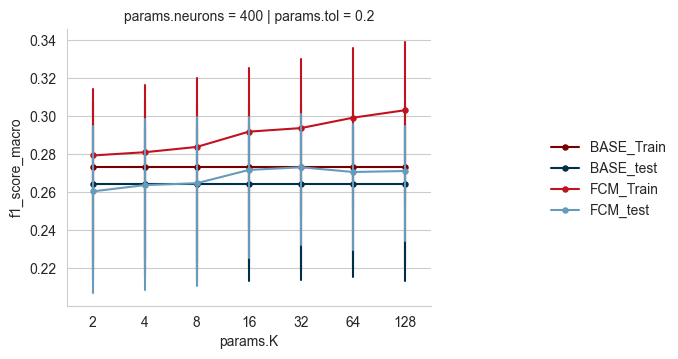

In [81]:
g = sns.FacetGrid(df_final2,row='params.neurons', col='params.tol')
g.map_dataframe(sns.pointplot,x='params.K',y='f1_score_macro',hue='Variable',palette = palette, markersize=3.5,linewidth=1.5)
g.add_legend()
#plt.ylim((0.87,0.94))
g.fig.set_size_inches(8, 4)